In [1]:
from skimage import data, color, io
from skimage.transform import rescale, resize
import numpy as np  
import keras

# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils # 用來後續將 label 標籤轉為 one-hot-encoding  
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import os
import os.path
from datetime import datetime
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten


In [2]:
IMAGE_DIRECTORY = './myDigits'

In [3]:
def ReadImageFile(filename):
    image1 = io.imread(filename, as_gray=True)
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(28,28,1) #/ 255
    return np.abs(1-X1)

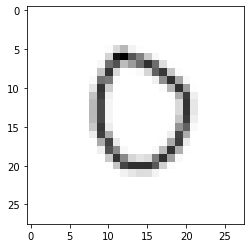

[[[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1. 

In [12]:
imageTest = io.imread(IMAGE_DIRECTORY + '/0.png', as_gray=True)
imageTest = resize(imageTest, (28, 28), anti_aliasing=True).reshape(28,28,1)
plt.imshow(imageTest, cmap = 'gray')
plt.show()
print(imageTest)

In [5]:
os.walk?

In [7]:
for dirpath, dirnames, filenames in os.walk(IMAGE_DIRECTORY):
    print(dirpath, dirnames, filenames)
    print('-' * 30)

./myDigits [] ['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', 'test_0.png', 'test_4.png', 'test_5.png', 'test_8.png', 'test_9.png']
------------------------------


In [16]:
def load_data():
    print("Loading images...")
    X = []
    y = []
    for dirpath, dirnames, filenames in os.walk(IMAGE_DIRECTORY):
        for filename in [f for f in filenames if f.endswith(".png")]:
            if filename[0].isnumeric():
                print(os.path.join(dirpath, filename))
                y.append(filename[0])
    #             X.append(ReadImageFile(dirpath + '/' + filename))
                X.append(ReadImageFile(os.path.join(dirpath, filename)))

    return X, y

In [17]:
X, y = load_data()
len(X), len(y)

Loading images...
./myDigits\0.png
./myDigits\1.png
./myDigits\2.png
./myDigits\3.png
./myDigits\4.png
./myDigits\5.png
./myDigits\6.png
./myDigits\7.png
./myDigits\8.png
./myDigits\9.png


(10, 10)

In [18]:
y

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [33]:
'''
# 資料量太少，不切割，避免y類別未完整(10種)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
'''
X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y), np.array(y)

In [98]:
# 將 training & testing 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000000100，即第8個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 
y_TrainOneHot.shape

(10, 10)

In [163]:
y_TrainOneHot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [191]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [119]:
# Method 1: No ImageDataGenerator
epochs = 1000
batch_size = 10
history = model.fit(X_train, y_TrainOneHot, batch_size=batch_size, epochs=epochs, validation_data = (X_train, y_TrainOneHot))

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 2.2890 - accuracy: 0.0000e+00 - val_loss: 2.2980 - val_accuracy: 0.1000
Epoch 2/1000
1/1 [==============================] - 0s 21ms/step - loss: 2.3112 - accuracy: 0.1000 - val_loss: 2.2931 - val_accuracy: 0.1000
Epoch 3/1000
1/1 [==============================] - 0s 22ms/step - loss: 2.3236 - accuracy: 0.0000e+00 - val_loss: 2.2897 - val_accuracy: 0.1000
Epoch 4/1000
1/1 [==============================] - 0s 20ms/step - loss: 2.3185 - accuracy: 0.1000 - val_loss: 2.2854 - val_accuracy: 0.1000
Epoch 5/1000
1/1 [==============================] - 0s 21ms/step - loss: 2.2938 - accuracy: 0.1000 - val_loss: 2.2804 - val_accuracy: 0.1000
Epoch 6/1000
1/1 [==============================] - 0s 20ms/step - loss: 2.3101 - accuracy: 0.1000 - val_loss: 2.2754 - val_accuracy: 0.2000
Epoch 7/1000
1/1 [==============================] - 0s 20ms/step - loss: 2.2881 - accuracy: 0.1000 - val_loss: 2.2703 - val_accuracy: 0.2000
Epoch 8

1/1 [==============================] - 0s 19ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 59/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 7.9328e-04 - val_accuracy: 1.0000
Epoch 60/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 5.2799e-04 - val_accuracy: 1.0000
Epoch 61/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 3.6684e-04 - val_accuracy: 1.0000
Epoch 62/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 2.6532e-04 - val_accuracy: 1.0000
Epoch 63/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.9820e-04 - val_accuracy: 1.0000
Epoch 64/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.5347e-04 - val_accuracy: 1.0

Epoch 114/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.0452e-04 - val_accuracy: 1.0000
Epoch 115/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 1.1038e-04 - val_accuracy: 1.0000
Epoch 116/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.0642e-04 - val_accuracy: 1.0000
Epoch 117/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1079 - accuracy: 0.9000 - val_loss: 2.3674e-05 - val_accuracy: 1.0000
Epoch 118/1000
1/1 [==============================] - 0s 18ms/step - loss: 5.7615e-04 - accuracy: 1.0000 - val_loss: 1.7547e-05 - val_accuracy: 1.0000
Epoch 119/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.8167e-05 - val_accuracy: 1.0000
Epoch 120/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1

1/1 [==============================] - 0s 20ms/step - loss: 2.6163e-04 - accuracy: 1.0000 - val_loss: 1.5222e-05 - val_accuracy: 1.0000
Epoch 170/1000
1/1 [==============================] - 0s 20ms/step - loss: 6.4389e-04 - accuracy: 1.0000 - val_loss: 1.3935e-05 - val_accuracy: 1.0000
Epoch 171/1000
1/1 [==============================] - 0s 18ms/step - loss: 5.2963e-05 - accuracy: 1.0000 - val_loss: 1.2826e-05 - val_accuracy: 1.0000
Epoch 172/1000
1/1 [==============================] - 0s 19ms/step - loss: 2.8058e-04 - accuracy: 1.0000 - val_loss: 1.1896e-05 - val_accuracy: 1.0000
Epoch 173/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.0907e-05 - val_accuracy: 1.0000
Epoch 174/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.0085e-05 - val_accuracy: 1.0000
Epoch 175/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 9.25

Epoch 224/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0771 - accuracy: 0.9000 - val_loss: 9.5367e-08 - val_accuracy: 1.0000
Epoch 225/1000
1/1 [==============================] - 0s 18ms/step - loss: 5.5147e-05 - accuracy: 1.0000 - val_loss: 1.3113e-07 - val_accuracy: 1.0000
Epoch 226/1000
1/1 [==============================] - 0s 20ms/step - loss: 9.1811e-05 - accuracy: 1.0000 - val_loss: 4.1723e-07 - val_accuracy: 1.0000
Epoch 227/1000
1/1 [==============================] - 0s 18ms/step - loss: 5.4440e-05 - accuracy: 1.0000 - val_loss: 3.5166e-06 - val_accuracy: 1.0000
Epoch 228/1000
1/1 [==============================] - 0s 18ms/step - loss: 9.8344e-06 - accuracy: 1.0000 - val_loss: 3.5542e-05 - val_accuracy: 1.0000
Epoch 229/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 2.9776e-04 - val_accuracy: 1.0000
Epoch 230/1000
1/1 [==============================] - 0s 19ms/step - loss: 4.0979e-04 - accuracy: 1.00

1/1 [==============================] - 0s 19ms/step - loss: 9.9653e-05 - accuracy: 1.0000 - val_loss: 1.7439e-05 - val_accuracy: 1.0000
Epoch 280/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.6104e-05 - val_accuracy: 1.0000
Epoch 281/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.4698e-04 - accuracy: 1.0000 - val_loss: 1.5031e-05 - val_accuracy: 1.0000
Epoch 282/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.9514e-05 - accuracy: 1.0000 - val_loss: 1.4173e-05 - val_accuracy: 1.0000
Epoch 283/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.2647e-05 - val_accuracy: 1.0000
Epoch 284/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.1003e-05 - val_accuracy: 1.0000
Epoch 285/1000
1/1 [==============================] - 0s 23ms/step - loss: 9.4298e-05 - accuracy: 1.0000 - val_loss: 9.72

1/1 [==============================] - 0s 20ms/step - loss: 9.3189e-05 - accuracy: 1.0000 - val_loss: 5.0186e-06 - val_accuracy: 1.0000
Epoch 334/1000
1/1 [==============================] - 0s 19ms/step - loss: 8.2931e-05 - accuracy: 1.0000 - val_loss: 5.2809e-06 - val_accuracy: 1.0000
Epoch 335/1000
1/1 [==============================] - 0s 20ms/step - loss: 9.9251e-04 - accuracy: 1.0000 - val_loss: 5.5550e-06 - val_accuracy: 1.0000
Epoch 336/1000
1/1 [==============================] - 0s 21ms/step - loss: 5.1079e-04 - accuracy: 1.0000 - val_loss: 5.8054e-06 - val_accuracy: 1.0000
Epoch 337/1000
1/1 [==============================] - 0s 20ms/step - loss: 7.1107e-05 - accuracy: 1.0000 - val_loss: 6.0438e-06 - val_accuracy: 1.0000
Epoch 338/1000
1/1 [==============================] - 0s 19ms/step - loss: 7.2155e-04 - accuracy: 1.0000 - val_loss: 6.2345e-06 - val_accuracy: 1.0000
Epoch 339/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0013 - accuracy: 1.0000 - val_lo

Epoch 388/1000
1/1 [==============================] - 0s 18ms/step - loss: 2.0121e-05 - accuracy: 1.0000 - val_loss: 4.5299e-07 - val_accuracy: 1.0000
Epoch 389/1000
1/1 [==============================] - 0s 18ms/step - loss: 6.7119e-05 - accuracy: 1.0000 - val_loss: 4.5299e-07 - val_accuracy: 1.0000
Epoch 390/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.2493e-05 - accuracy: 1.0000 - val_loss: 4.4107e-07 - val_accuracy: 1.0000
Epoch 391/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.1411e-04 - accuracy: 1.0000 - val_loss: 4.4107e-07 - val_accuracy: 1.0000
Epoch 392/1000
1/1 [==============================] - 0s 19ms/step - loss: 5.1260e-07 - accuracy: 1.0000 - val_loss: 4.4107e-07 - val_accuracy: 1.0000
Epoch 393/1000
1/1 [==============================] - 0s 21ms/step - loss: 4.4226e-06 - accuracy: 1.0000 - val_loss: 4.2915e-07 - val_accuracy: 1.0000
Epoch 394/1000
1/1 [==============================] - 0s 20ms/step - loss: 1.6377e-04 - accura

1/1 [==============================] - 0s 19ms/step - loss: 5.2899e-05 - accuracy: 1.0000 - val_loss: 2.3375e-05 - val_accuracy: 1.0000
Epoch 443/1000
1/1 [==============================] - 0s 21ms/step - loss: 4.4915e-05 - accuracy: 1.0000 - val_loss: 2.1540e-05 - val_accuracy: 1.0000
Epoch 444/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.8920e-04 - accuracy: 1.0000 - val_loss: 1.9919e-05 - val_accuracy: 1.0000
Epoch 445/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.8393e-05 - val_accuracy: 1.0000
Epoch 446/1000
1/1 [==============================] - 0s 19ms/step - loss: 2.3855e-04 - accuracy: 1.0000 - val_loss: 1.7082e-05 - val_accuracy: 1.0000
Epoch 447/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.5437e-05 - val_accuracy: 1.0000
Epoch 448/1000
1/1 [==============================] - 0s 20ms/step - loss: 6.1176e-04 - accuracy: 1.0000 - val_loss: 

1/1 [==============================] - 0s 21ms/step - loss: 3.5454e-04 - accuracy: 1.0000 - val_loss: 2.0323e-05 - val_accuracy: 1.0000
Epoch 497/1000
1/1 [==============================] - 0s 19ms/step - loss: 9.9156e-05 - accuracy: 1.0000 - val_loss: 3.0120e-05 - val_accuracy: 1.0000
Epoch 498/1000
1/1 [==============================] - 0s 19ms/step - loss: 4.8054e-04 - accuracy: 1.0000 - val_loss: 4.3454e-05 - val_accuracy: 1.0000
Epoch 499/1000
1/1 [==============================] - 0s 20ms/step - loss: 1.7012e-04 - accuracy: 1.0000 - val_loss: 6.2387e-05 - val_accuracy: 1.0000
Epoch 500/1000
1/1 [==============================] - 0s 18ms/step - loss: 1.8297e-05 - accuracy: 1.0000 - val_loss: 8.8057e-05 - val_accuracy: 1.0000
Epoch 501/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.4807e-04 - accuracy: 1.0000 - val_loss: 1.2033e-04 - val_accuracy: 1.0000
Epoch 502/1000
1/1 [==============================] - 0s 20ms/step - loss: 2.0363e-04 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 24ms/step - loss: 1.4305e-07 - accuracy: 1.0000 - val_loss: 3.5763e-08 - val_accuracy: 1.0000
Epoch 551/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 3.5763e-08 - val_accuracy: 1.0000
Epoch 552/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.9314e-04 - accuracy: 1.0000 - val_loss: 3.5763e-08 - val_accuracy: 1.0000
Epoch 553/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.0517e-06 - accuracy: 1.0000 - val_loss: 3.5763e-08 - val_accuracy: 1.0000
Epoch 554/1000
1/1 [==============================] - 0s 20ms/step - loss: 4.2692e-05 - accuracy: 1.0000 - val_loss: 1.1921e-08 - val_accuracy: 1.0000
Epoch 555/1000
1/1 [==============================] - 0s 20ms/step - loss: 1.5497e-07 - accuracy: 1.0000 - val_loss: 1.1921e-08 - val_accuracy: 1.0000
Epoch 556/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_lo

1/1 [==============================] - 0s 19ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 5.9605e-08 - val_accuracy: 1.0000
Epoch 605/1000
1/1 [==============================] - 0s 20ms/step - loss: 8.8450e-06 - accuracy: 1.0000 - val_loss: 5.9605e-08 - val_accuracy: 1.0000
Epoch 606/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 5.9605e-08 - val_accuracy: 1.0000
Epoch 607/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.4305e-06 - accuracy: 1.0000 - val_loss: 5.9605e-08 - val_accuracy: 1.0000
Epoch 608/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 5.9605e-08 - val_accuracy: 1.0000
Epoch 609/1000
1/1 [==============================] - 0s 19ms/step - loss: 7.8438e-06 - accuracy: 1.0000 - val_loss: 5.9605e-08 - val_accuracy: 1.0000
Epoch 610/1000
1/1 [==============================] - 0s 19ms/step - loss: 4.0881e-05 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 21ms/step - loss: 1.9073e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 659/1000
1/1 [==============================] - 0s 19ms/step - loss: 2.0266e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 660/1000
1/1 [==============================] - 0s 19ms/step - loss: 5.9245e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 661/1000
1/1 [==============================] - 0s 19ms/step - loss: 9.5367e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 662/1000
1/1 [==============================] - 0s 20ms/step - loss: 2.6226e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 663/1000
1/1 [==============================] - 0s 18ms/step - loss: 2.7224e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 664/1000
1/1 [==============================] - 0s 18ms/step - loss: 1.5497e-07 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 22ms/step - loss: 2.3842e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 713/1000
1/1 [==============================] - 0s 22ms/step - loss: 3.5763e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 714/1000
1/1 [==============================] - 0s 21ms/step - loss: 9.2983e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 715/1000
1/1 [==============================] - 0s 23ms/step - loss: 1.1921e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 716/1000
1/1 [==============================] - 0s 20ms/step - loss: 4.7684e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 717/1000
1/1 [==============================] - 0s 21ms/step - loss: 5.5238e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 718/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 20ms/step - loss: 1.5556e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 767/1000
1/1 [==============================] - 0s 18ms/step - loss: 2.9802e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 768/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.8120e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 769/1000
1/1 [==============================] - 0s 19ms/step - loss: 2.6226e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 770/1000
1/1 [==============================] - 0s 18ms/step - loss: 9.1791e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 771/1000
1/1 [==============================] - 0s 20ms/step - loss: 1.1921e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 772/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.1706e-05 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 22ms/step - loss: 4.7684e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 821/1000
1/1 [==============================] - 0s 20ms/step - loss: 5.4836e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 822/1000
1/1 [==============================] - 0s 19ms/step - loss: 2.6464e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 823/1000
1/1 [==============================] - 0s 18ms/step - loss: 9.6436e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 824/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.5763e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 825/1000
1/1 [==============================] - 0s 19ms/step - loss: 2.3842e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 826/1000
1/1 [==============================] - 0s 18ms/step - loss: 8.3446e-08 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 21ms/step - loss: 5.4836e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 875/1000
1/1 [==============================] - 0s 20ms/step - loss: 3.9503e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 876/1000
1/1 [==============================] - 0s 20ms/step - loss: 3.0994e-07 - accuracy: 1.0000 - val_loss: 2.3842e-08 - val_accuracy: 1.0000
Epoch 877/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.1682e-05 - accuracy: 1.0000 - val_loss: 3.5763e-08 - val_accuracy: 1.0000
Epoch 878/1000
1/1 [==============================] - 0s 19ms/step - loss: 2.3842e-08 - accuracy: 1.0000 - val_loss: 5.9605e-08 - val_accuracy: 1.0000
Epoch 879/1000
1/1 [==============================] - 0s 21ms/step - loss: 2.8570e-05 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 880/1000
1/1 [==============================] - 0s 20ms/step - loss: 1.1325e-06 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 22ms/step - loss: 1.1921e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 929/1000
1/1 [==============================] - 0s 19ms/step - loss: 8.3446e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 930/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.1921e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 931/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.6960e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 932/1000
1/1 [==============================] - 0s 18ms/step - loss: 7.5576e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 933/1000
1/1 [==============================] - 0s 18ms/step - loss: 2.6773e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 934/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.1921e-08 - accuracy: 1.0000 - va

1/1 [==============================] - 0s 21ms/step - loss: 0.0768 - accuracy: 0.9000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 983/1000
1/1 [==============================] - 0s 22ms/step - loss: 7.2477e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 984/1000
1/1 [==============================] - 0s 20ms/step - loss: 1.3252e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 985/1000
1/1 [==============================] - 0s 18ms/step - loss: 1.2040e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 986/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.9346e-05 - accuracy: 1.0000 - val_loss: 2.3842e-08 - val_accuracy: 1.0000
Epoch 987/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.0729e-07 - val_accuracy: 1.0000
Epoch 988/1000
1/1 [==============================] - 0s 19ms/step - loss: 7.0452e-05 - accuracy: 1.0000 - val_loss: 

In [143]:
# Method 2: With ImageDataGenerator
epochs = 1000
batch_size = 10
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2)

# datagen.fit(X_train)

# history = model.fit_generator(datagen.flow(X_train, y_TrainOneHot, batch_size=batch_size), epochs=epochs,
#                               verbose=2,
#                               steps_per_epoch=1) #X_train.shape[0]//batch_size
# history = model.fit_generator(datagen.flow(X_train, y_TrainOneHot, batch_size=batch_size), epochs=epochs, verbose=2)
history = model.fit(datagen.flow(X_train, y_TrainOneHot, batch_size=batch_size),        
                    epochs=epochs,
                    validation_data = (X_train, y_TrainOneHot))

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 2.3121 - accuracy: 0.0000e+00 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 2/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.3151 - accuracy: 0.1000 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 3/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.3136 - accuracy: 0.0000e+00 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2923 - accuracy: 0.2000 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 5/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.2899 - accuracy: 0.0000e+00 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 6/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.3023 - accuracy: 0.1000 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 7/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.3221 - accuracy: 0.0000e+00 - val_loss: 2.3032 - val_accuracy: 0.1000

1/1 [==============================] - 0s 28ms/step - loss: 2.2137 - accuracy: 0.2000 - val_loss: 1.7946 - val_accuracy: 0.4000
Epoch 59/1000
1/1 [==============================] - 0s 27ms/step - loss: 2.1913 - accuracy: 0.4000 - val_loss: 1.8188 - val_accuracy: 0.5000
Epoch 60/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8849 - accuracy: 0.3000 - val_loss: 1.7398 - val_accuracy: 0.4000
Epoch 61/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9580 - accuracy: 0.3000 - val_loss: 1.6483 - val_accuracy: 0.4000
Epoch 62/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8547 - accuracy: 0.3000 - val_loss: 1.5862 - val_accuracy: 0.4000
Epoch 63/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7401 - accuracy: 0.5000 - val_loss: 1.5436 - val_accuracy: 0.5000
Epoch 64/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.0576 - accuracy: 0.5000 - val_loss: 1.5002 - val_accuracy: 0.4000
Epoch 65/1000
1/1 [=

Epoch 116/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6924 - accuracy: 0.5000 - val_loss: 1.2209 - val_accuracy: 0.6000
Epoch 117/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6505 - accuracy: 0.4000 - val_loss: 1.2100 - val_accuracy: 0.7000
Epoch 118/1000
1/1 [==============================] - ETA: 0s - loss: 1.9777 - accuracy: 0.20 - 0s 27ms/step - loss: 1.9777 - accuracy: 0.2000 - val_loss: 1.1851 - val_accuracy: 0.7000
Epoch 119/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7862 - accuracy: 0.3000 - val_loss: 1.1548 - val_accuracy: 0.7000
Epoch 120/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6878 - accuracy: 0.3000 - val_loss: 1.1326 - val_accuracy: 0.8000
Epoch 121/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5356 - accuracy: 0.4000 - val_loss: 1.1116 - val_accuracy: 0.8000
Epoch 122/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.4804 - accuracy: 0.5000

Epoch 173/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4753 - accuracy: 0.6000 - val_loss: 0.5897 - val_accuracy: 0.8000
Epoch 174/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4024 - accuracy: 0.5000 - val_loss: 0.5502 - val_accuracy: 1.0000
Epoch 175/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1659 - accuracy: 0.7000 - val_loss: 0.5481 - val_accuracy: 1.0000
Epoch 176/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4168 - accuracy: 0.5000 - val_loss: 0.5712 - val_accuracy: 1.0000
Epoch 177/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.0270 - accuracy: 0.6000 - val_loss: 0.5865 - val_accuracy: 1.0000
Epoch 178/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.0100 - accuracy: 0.5000 - val_loss: 0.5786 - val_accuracy: 1.0000
Epoch 179/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9470 - accuracy: 0.5000 - val_loss: 0.5617 - val_accuracy: 1.0000

1/1 [==============================] - 0s 30ms/step - loss: 1.3188 - accuracy: 0.6000 - val_loss: 0.4037 - val_accuracy: 1.0000
Epoch 231/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1150 - accuracy: 0.5000 - val_loss: 0.3854 - val_accuracy: 1.0000
Epoch 232/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.7311 - accuracy: 0.8000 - val_loss: 0.3701 - val_accuracy: 0.9000
Epoch 233/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.9059 - accuracy: 0.5000 - val_loss: 0.3628 - val_accuracy: 0.9000
Epoch 234/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1117 - accuracy: 0.5000 - val_loss: 0.3703 - val_accuracy: 0.9000
Epoch 235/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.8611 - accuracy: 0.6000 - val_loss: 0.3843 - val_accuracy: 0.8000
Epoch 236/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.2559 - accuracy: 0.6000 - val_loss: 0.3664 - val_accuracy: 0.8000
Epoch 237/1000

1/1 [==============================] - 0s 28ms/step - loss: 0.8033 - accuracy: 0.5000 - val_loss: 0.2033 - val_accuracy: 1.0000
Epoch 288/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.7538 - accuracy: 0.9000 - val_loss: 0.2022 - val_accuracy: 1.0000
Epoch 289/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1221 - accuracy: 0.5000 - val_loss: 0.1991 - val_accuracy: 1.0000
Epoch 290/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7012 - accuracy: 0.6000 - val_loss: 0.1957 - val_accuracy: 1.0000
Epoch 291/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6831 - accuracy: 0.8000 - val_loss: 0.1841 - val_accuracy: 1.0000
Epoch 292/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8027 - accuracy: 0.6000 - val_loss: 0.1801 - val_accuracy: 1.0000
Epoch 293/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1365 - accuracy: 0.7000 - val_loss: 0.1679 - val_accuracy: 1.0000
Epoch 294/1000

1/1 [==============================] - 0s 27ms/step - loss: 0.5884 - accuracy: 0.8000 - val_loss: 0.1142 - val_accuracy: 1.0000
Epoch 345/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.6549 - accuracy: 0.7000 - val_loss: 0.0991 - val_accuracy: 1.0000
Epoch 346/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.6027 - accuracy: 0.8000 - val_loss: 0.1225 - val_accuracy: 1.0000
Epoch 347/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0956 - accuracy: 0.7000 - val_loss: 0.1438 - val_accuracy: 0.9000
Epoch 348/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.8378 - accuracy: 0.8000 - val_loss: 0.1277 - val_accuracy: 1.0000
Epoch 349/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.5933 - accuracy: 0.8000 - val_loss: 0.1085 - val_accuracy: 1.0000
Epoch 350/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1245 - accuracy: 1.0000 - val_loss: 0.0961 - val_accuracy: 1.0000
Epoch 351/1000

1/1 [==============================] - 0s 31ms/step - loss: 0.5961 - accuracy: 0.7000 - val_loss: 0.3079 - val_accuracy: 0.9000
Epoch 402/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.2961 - accuracy: 1.0000 - val_loss: 0.2547 - val_accuracy: 0.9000
Epoch 403/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.9546 - accuracy: 0.6000 - val_loss: 0.2285 - val_accuracy: 0.9000
Epoch 404/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.5895 - accuracy: 0.8000 - val_loss: 0.1866 - val_accuracy: 0.9000
Epoch 405/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.3838 - accuracy: 0.8000 - val_loss: 0.1355 - val_accuracy: 0.9000
Epoch 406/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.4430 - accuracy: 0.9000 - val_loss: 0.1178 - val_accuracy: 0.9000
Epoch 407/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.4023 - accuracy: 0.9000 - val_loss: 0.0941 - val_accuracy: 1.0000
Epoch 408/1000

1/1 [==============================] - 0s 29ms/step - loss: 0.4369 - accuracy: 0.9000 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 459/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6117 - accuracy: 0.7000 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 460/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.4185 - accuracy: 0.8000 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 461/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.2840 - accuracy: 0.8000 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 462/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.2416 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 463/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.8952 - accuracy: 0.7000 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 464/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1642 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 465/1000

1/1 [==============================] - 0s 28ms/step - loss: 0.5099 - accuracy: 0.7000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 516/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1214 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 517/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.3372 - accuracy: 0.9000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 518/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1102 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 519/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1199 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 520/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.2918 - accuracy: 0.9000 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 521/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1005 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 522/1000

1/1 [==============================] - 0s 27ms/step - loss: 0.3645 - accuracy: 0.8000 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 573/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.2023 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 574/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.5461 - accuracy: 0.8000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 575/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.7330 - accuracy: 0.9000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 576/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.2125 - accuracy: 0.9000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 577/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0945 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 578/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.4661 - accuracy: 0.9000 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 579/1000

1/1 [==============================] - 0s 32ms/step - loss: 0.1122 - accuracy: 0.9000 - val_loss: 6.6590e-04 - val_accuracy: 1.0000
Epoch 630/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.4218 - accuracy: 0.8000 - val_loss: 6.8154e-04 - val_accuracy: 1.0000
Epoch 631/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.8730 - accuracy: 0.9000 - val_loss: 7.0773e-04 - val_accuracy: 1.0000
Epoch 632/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.9000 - val_loss: 7.4732e-04 - val_accuracy: 1.0000
Epoch 633/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 8.3414e-04 - val_accuracy: 1.0000
Epoch 634/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.1253 - accuracy: 1.0000 - val_loss: 8.7516e-04 - val_accuracy: 1.0000
Epoch 635/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.1207 - accuracy: 1.0000 - val_loss: 9.4900e-04 - val_acc

1/1 [==============================] - 0s 33ms/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 687/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1204 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 688/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.1826 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 689/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.2062 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 690/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1362 - accuracy: 0.9000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 691/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.2671 - accuracy: 0.9000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 692/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.1237 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 693/1000

1/1 [==============================] - 0s 28ms/step - loss: 0.0799 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 744/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0752 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 745/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0474 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 746/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 747/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0669 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 748/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 749/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 750/1000

1/1 [==============================] - 0s 28ms/step - loss: 0.0533 - accuracy: 1.0000 - val_loss: 2.1095e-04 - val_accuracy: 1.0000
Epoch 800/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.2597 - accuracy: 0.9000 - val_loss: 2.4685e-04 - val_accuracy: 1.0000
Epoch 801/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 2.9513e-04 - val_accuracy: 1.0000
Epoch 802/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1712 - accuracy: 0.9000 - val_loss: 3.6124e-04 - val_accuracy: 1.0000
Epoch 803/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1376 - accuracy: 1.0000 - val_loss: 4.3088e-04 - val_accuracy: 1.0000
Epoch 804/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 5.1073e-04 - val_accuracy: 1.0000
Epoch 805/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0856 - accuracy: 1.0000 - val_loss: 5.8875e-04 - val_acc

Epoch 855/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.2229 - accuracy: 0.9000 - val_loss: 7.1693e-04 - val_accuracy: 1.0000
Epoch 856/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.4420 - accuracy: 0.7000 - val_loss: 6.9832e-04 - val_accuracy: 1.0000
Epoch 857/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0989 - accuracy: 1.0000 - val_loss: 6.7103e-04 - val_accuracy: 1.0000
Epoch 858/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1162 - accuracy: 1.0000 - val_loss: 6.9608e-04 - val_accuracy: 1.0000
Epoch 859/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.1369 - accuracy: 0.9000 - val_loss: 6.3942e-04 - val_accuracy: 1.0000
Epoch 860/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.2788 - accuracy: 0.9000 - val_loss: 5.8447e-04 - val_accuracy: 1.0000
Epoch 861/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 5.787

Epoch 911/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.1815 - accuracy: 0.9000 - val_loss: 4.3659e-04 - val_accuracy: 1.0000
Epoch 912/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 4.3807e-04 - val_accuracy: 1.0000
Epoch 913/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 4.2710e-04 - val_accuracy: 1.0000
Epoch 914/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1142 - accuracy: 0.9000 - val_loss: 4.1067e-04 - val_accuracy: 1.0000
Epoch 915/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 4.0290e-04 - val_accuracy: 1.0000
Epoch 916/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 4.0220e-04 - val_accuracy: 1.0000
Epoch 917/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 4.089

1/1 [==============================] - 0s 27ms/step - loss: 0.0635 - accuracy: 1.0000 - val_loss: 5.6187e-05 - val_accuracy: 1.0000
Epoch 968/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.3830 - accuracy: 0.9000 - val_loss: 5.2779e-05 - val_accuracy: 1.0000
Epoch 969/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 5.9859e-05 - val_accuracy: 1.0000
Epoch 970/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.1587 - accuracy: 0.9000 - val_loss: 8.5327e-05 - val_accuracy: 1.0000
Epoch 971/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1916 - accuracy: 0.9000 - val_loss: 1.6864e-04 - val_accuracy: 1.0000
Epoch 972/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.5223 - accuracy: 0.8000 - val_loss: 2.8015e-04 - val_accuracy: 1.0000
Epoch 973/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1692 - accuracy: 0.9000 - val_loss: 3.5478e-04 - val_acc

(10, 28, 28, 1) (10, 10)


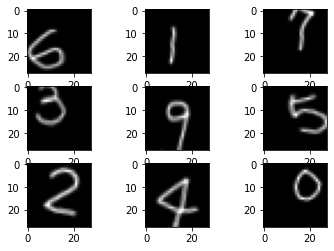

In [168]:
# for X_batch, y_batch in datagen.flow(X_train, y_TrainOneHot, batch_size=32):
for X_batch, y_batch in datagen.flow(X_train, y_TrainOneHot):
    print(X_batch.shape, y_batch.shape)
    # create a grid of 3x3 images
    for i in range(9):
        plt.subplot(330 + 1 + i)
#         plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.imshow(X_batch[i], cmap='gray')
    # show the plot
    plt.show()
    break

In [192]:
# Method 3: With ImageDataGenerator (Prepare data)
datagen = ImageDataGenerator(
        rotation_range=30,
        zoom_range=0.3,
        width_shift_range=0.3,
        height_shift_range=0.3)

X_aug = X_train
y_aug = y_TrainOneHot
for i in range(199):
    for X_batch, y_batch in datagen.flow(X_train, y_TrainOneHot):
        X_aug = np.concatenate((X_aug, X_batch), axis=0)
        y_aug = np.concatenate((y_aug, y_batch), axis=0)
        break
X_aug.shape, y_aug.shape

((2000, 28, 28, 1), (2000, 10))

In [193]:
# Method 3: With ImageDataGenerator (Training)
epochs = 200
batch_size = 1000

history = model.fit(X_aug, y_aug, batch_size=batch_size, epochs=epochs, validation_data = (X_aug, y_aug))

Epoch 1/200
2/2 [==============================] - 2s 350ms/step - loss: 2.3030 - accuracy: 0.1037 - val_loss: 2.2955 - val_accuracy: 0.1040
Epoch 2/200
2/2 [==============================] - 0s 48ms/step - loss: 2.2930 - accuracy: 0.1103 - val_loss: 2.2817 - val_accuracy: 0.1000
Epoch 3/200
2/2 [==============================] - 0s 47ms/step - loss: 2.2811 - accuracy: 0.1047 - val_loss: 2.2662 - val_accuracy: 0.1015
Epoch 4/200
2/2 [==============================] - 0s 47ms/step - loss: 2.2692 - accuracy: 0.1130 - val_loss: 2.2512 - val_accuracy: 0.1420
Epoch 5/200
2/2 [==============================] - 0s 49ms/step - loss: 2.2590 - accuracy: 0.1170 - val_loss: 2.2384 - val_accuracy: 0.1675
Epoch 6/200
2/2 [==============================] - 0s 48ms/step - loss: 2.2447 - accuracy: 0.1283 - val_loss: 2.2068 - val_accuracy: 0.1855
Epoch 7/200
2/2 [==============================] - 0s 47ms/step - loss: 2.2118 - accuracy: 0.1603 - val_loss: 2.1698 - val_accuracy: 0.2030
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 47ms/step - loss: 0.4706 - accuracy: 0.8317 - val_loss: 0.2895 - val_accuracy: 0.9250
Epoch 60/200
2/2 [==============================] - 0s 47ms/step - loss: 0.4755 - accuracy: 0.8303 - val_loss: 0.2571 - val_accuracy: 0.9335
Epoch 61/200
2/2 [==============================] - 0s 46ms/step - loss: 0.4859 - accuracy: 0.8317 - val_loss: 0.2623 - val_accuracy: 0.9375
Epoch 62/200
2/2 [==============================] - 0s 46ms/step - loss: 0.4643 - accuracy: 0.8410 - val_loss: 0.2558 - val_accuracy: 0.9330
Epoch 63/200
2/2 [==============================] - 0s 48ms/step - loss: 0.4705 - accuracy: 0.8307 - val_loss: 0.2374 - val_accuracy: 0.9475
Epoch 64/200
2/2 [==============================] - 0s 46ms/step - loss: 0.4228 - accuracy: 0.8617 - val_loss: 0.2343 - val_accuracy: 0.9345
Epoch 65/200
2/2 [==============================] - 0s 49ms/step - loss: 0.4239 - accuracy: 0.8523 - val_loss: 0.2434 - val_accuracy: 0.9400
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 47ms/step - loss: 0.1625 - accuracy: 0.9440 - val_loss: 0.0448 - val_accuracy: 0.9885
Epoch 118/200
2/2 [==============================] - 0s 46ms/step - loss: 0.1596 - accuracy: 0.9497 - val_loss: 0.0436 - val_accuracy: 0.9880
Epoch 119/200
2/2 [==============================] - 0s 46ms/step - loss: 0.1576 - accuracy: 0.9470 - val_loss: 0.0447 - val_accuracy: 0.9875
Epoch 120/200
2/2 [==============================] - 0s 46ms/step - loss: 0.1546 - accuracy: 0.9517 - val_loss: 0.0424 - val_accuracy: 0.9890
Epoch 121/200
2/2 [==============================] - 0s 47ms/step - loss: 0.1447 - accuracy: 0.9553 - val_loss: 0.0411 - val_accuracy: 0.9900
Epoch 122/200
2/2 [==============================] - 0s 46ms/step - loss: 0.1330 - accuracy: 0.9553 - val_loss: 0.0416 - val_accuracy: 0.9895
Epoch 123/200
2/2 [==============================] - 0s 47ms/step - loss: 0.1297 - accuracy: 0.9560 - val_loss: 0.0379 - val_accuracy: 0.9900
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 47ms/step - loss: 0.0683 - accuracy: 0.9807 - val_loss: 0.0135 - val_accuracy: 0.9970
Epoch 176/200
2/2 [==============================] - 0s 45ms/step - loss: 0.0719 - accuracy: 0.9763 - val_loss: 0.0143 - val_accuracy: 0.9965
Epoch 177/200
2/2 [==============================] - 0s 46ms/step - loss: 0.0736 - accuracy: 0.9767 - val_loss: 0.0144 - val_accuracy: 0.9965
Epoch 178/200
2/2 [==============================] - 0s 46ms/step - loss: 0.0786 - accuracy: 0.9730 - val_loss: 0.0125 - val_accuracy: 0.9965
Epoch 179/200
2/2 [==============================] - 0s 46ms/step - loss: 0.0744 - accuracy: 0.9740 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 46ms/step - loss: 0.0703 - accuracy: 0.9730 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 181/200
2/2 [==============================] - 0s 48ms/step - loss: 0.0658 - accuracy: 0.9797 - val_loss: 0.0123 - val_accuracy: 0.9970
Epoch 

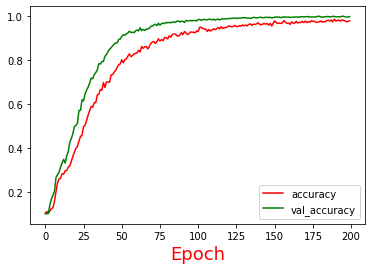

In [194]:
plt.plot(history.history['accuracy'], 'r', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'g', label = 'val_accuracy')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='lower right')

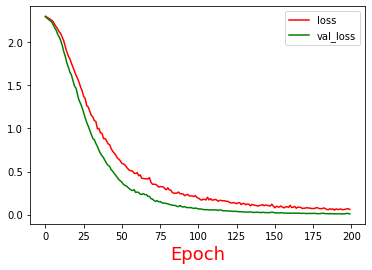

In [195]:
plt.plot(history.history['loss'], 'r', label = 'loss')
plt.plot(history.history['val_loss'], 'g', label = 'val_loss')
plt.xlabel('Epoch', fontdict={'c': 'r', 'size': 18})
plt.legend(loc='upper right')

In [196]:
# Predict
X = []
X.append(ReadImageFile(IMAGE_DIRECTORY + '/2.png'))
X.append(ReadImageFile(IMAGE_DIRECTORY + '/3.png'))
X.append(ReadImageFile(IMAGE_DIRECTORY + '/5.png'))
X.append(ReadImageFile(IMAGE_DIRECTORY + '/test_0.png'))
X.append(ReadImageFile(IMAGE_DIRECTORY + '/test_4.png'))
X.append(ReadImageFile(IMAGE_DIRECTORY + '/test_5.png'))
X.append(ReadImageFile(IMAGE_DIRECTORY + '/test_8.png'))
X.append(ReadImageFile(IMAGE_DIRECTORY + '/test_9.png'))
X = np.array(X)
print(X.shape)
# model.predict_classes(X)
np.argmax(model.predict(X), axis = 1)

(8, 28, 28, 1)


array([2, 3, 5, 0, 4, 2, 8, 9], dtype=int64)

In [197]:
model.predict(X)

array([[4.1593142e-11, 7.4433886e-22, 9.9999797e-01, 4.9480116e-07,
        7.1084294e-10, 3.4023958e-07, 1.2674387e-06, 3.9537010e-20,
        5.3831190e-14, 8.5433649e-15],
       [4.6225529e-18, 2.6274809e-24, 1.7868118e-15, 1.0000000e+00,
        1.3855745e-22, 1.5882220e-09, 2.5834636e-15, 9.1123316e-31,
        5.2388231e-16, 4.4782983e-18],
       [4.0121723e-13, 6.6600247e-20, 9.6027752e-12, 1.9591297e-08,
        3.3553959e-18, 1.0000000e+00, 4.4868007e-09, 2.7739817e-28,
        3.3854718e-16, 8.2758533e-23],
       [9.9993694e-01, 2.0805223e-06, 3.8229969e-06, 5.0739413e-09,
        9.1828767e-11, 3.2377070e-08, 2.0646897e-10, 5.7170353e-05,
        2.2376383e-09, 3.1926232e-11],
       [3.0049829e-05, 3.5866213e-13, 9.3949154e-08, 1.3710987e-05,
        9.9973994e-01, 1.6716047e-05, 1.9026962e-07, 4.9589926e-05,
        1.3418873e-04, 1.5555384e-05],
       [5.1724896e-06, 3.5141241e-09, 9.9043769e-01, 6.7034294e-03,
        3.1632728e-06, 1.9474067e-03, 4.9185794e-04, 4.96